In [18]:
import numpy as np
import pandas as pd
import requests
#from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import cv2
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [ ]:
from albumentations import (
    Compose,
    HorizontalFlip,
    VerticalFlip,
    RandomRotate90,
    ShiftScaleRotate,
    RandomBrightnessContrast,
    Resize,
)

In [16]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Install kaggle
#!pip install -q kaggle

In [ ]:
#Upload the kaggle API
#from google.colab import files
#files.upload()  # Choose the kaggle.json file that you downloaded

In [ ]:
#Move API token
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Download the dataset
#!kaggle datasets download -d nih-chest-xrays/data -p /content/drive/Shareddrives/Data-255/Dataset
#!kaggle datasets download -d nikhilpandey360/chest-xray-masks-and-labels -p /content/drive/Shareddrives/Data-255/Dataset


In [ ]:
#Unzip the downladed data.zip file
'''
import zipfile
import os

# Set the path to the zip file
zip_file_path = '/content/drive/Shareddrives/Data-255/Dataset/data.zip'

# Set the directory where you want to extract the contents
extracted_dir = '/content/drive/Shareddrives/Data-255/Dataset/data'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List all the folders and files in the extracted directory
contents = os.listdir(extracted_dir)
print("Contents of the extracted directory:")
print(contents)
'''

'\nimport zipfile\nimport os\n\n# Set the path to the zip file\nzip_file_path = \'/content/drive/Shareddrives/Data-255/Dataset/data.zip\'\n\n# Set the directory where you want to extract the contents\nextracted_dir = \'/content/drive/Shareddrives/Data-255/Dataset/data\'\n\n# Extract the contents of the zip file\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extracted_dir)\n\n# List all the folders and files in the extracted directory\ncontents = os.listdir(extracted_dir)\nprint("Contents of the extracted directory:")\nprint(contents)\n'

In [ ]:
#Unzip the downladed data.zip file
'''
import zipfile
import os

# Set the path to the zip file
zip_file_path = '/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels.zip'

# Set the directory where you want to extract the contents
extracted_dir = '/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# List all the folders and files in the extracted directory
contents = os.listdir(extracted_dir)
print("Contents of the extracted directory:")
print(contents)
'''

'\nimport zipfile\nimport os\n\n# Set the path to the zip file\nzip_file_path = \'/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels.zip\'\n\n# Set the directory where you want to extract the contents\nextracted_dir = \'/content/drive/Shareddrives/Data-255/Dataset/chest-xray-masks-and-labels\'\n\n# Extract the contents of the zip file\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extracted_dir)\n\n# List all the folders and files in the extracted directory\ncontents = os.listdir(extracted_dir)\nprint("Contents of the extracted directory:")\nprint(contents)\n'

In [4]:
# File path to the Data Entry of the patients file
file_path_patients = '/content/drive/Shareddrives/Data-255/Dataset/data/Data_Entry_2017.csv'
# File path to the Data Entry of the disease classification
file_path_seg = '/content/drive/Shareddrives/Data-255/Dataset/data/BBox_List_2017.csv'


**Data Discovery and Analysis**

In [5]:
# reading the patients' diagnosis information
df_patient = pd.read_csv(file_path_patients, usecols=['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender','View Position','OriginalImage[Width','Height]','OriginalImagePixelSpacing[x','y]'])
df_patient.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [6]:
print('Shape of the data : ',df_patient.shape)

Shape of the data :  (112120, 11)


In [7]:
#Dataset's descriptive statistics
df_patient.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


In [8]:
# Check for missing values
print(df_patient.isnull().sum())

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
Patient Gender                 0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
dtype: int64


In [9]:
# Visualize the distribution of numerical features
sns.pairplot(df_patient)
plt.show()

KeyboardInterrupt: 

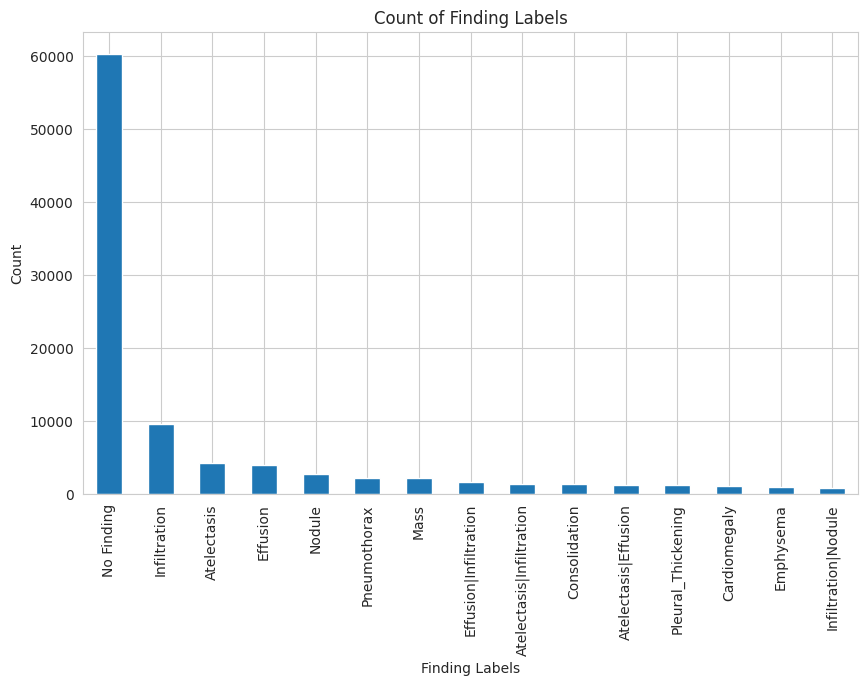

In [ ]:
#Visualize the dataset based on finding labels/diseases
label_counts = df_patient['Finding Labels'].value_counts()[:15]
# Plot the bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Count of Finding Labels')
plt.xlabel('Finding Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

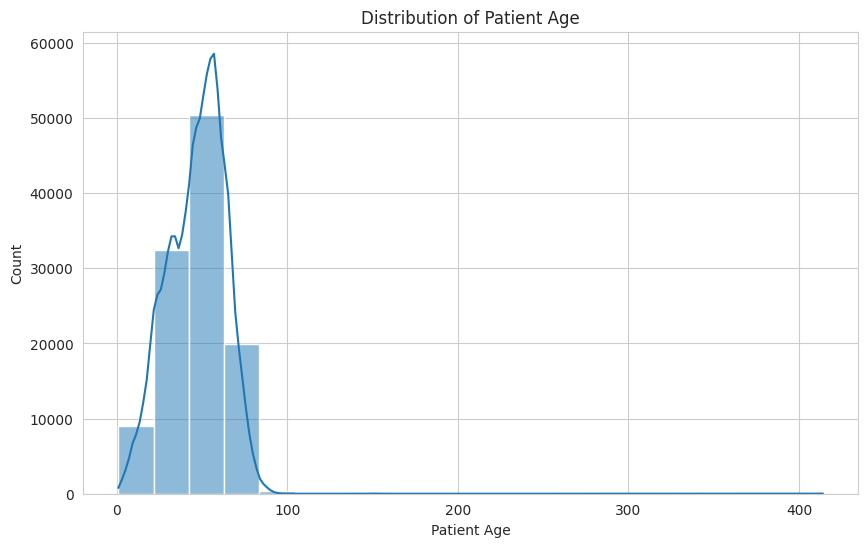

In [ ]:
# Patient Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_patient, x='Patient Age', bins=20, kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

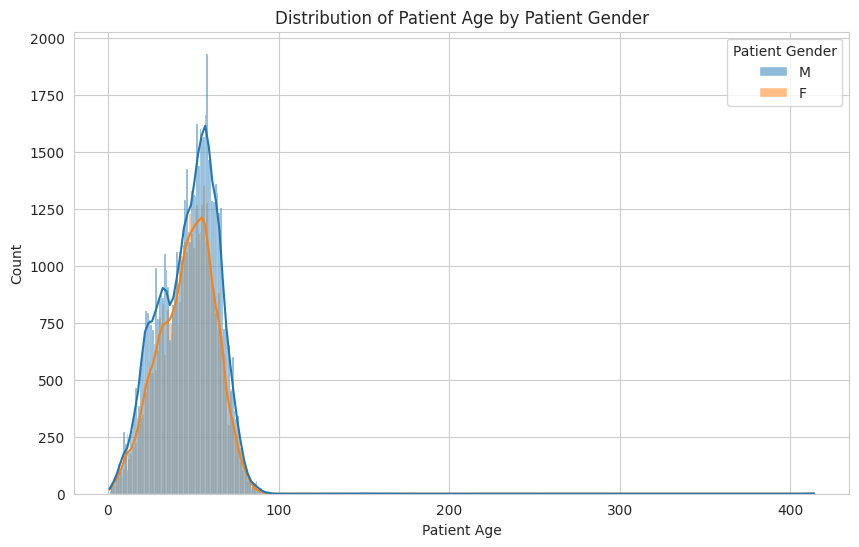

In [ ]:
#Distribution of Patient Age by Patient Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_patient, x='Patient Age', hue='Patient Gender', kde=True)
plt.title('Distribution of Patient Age by Patient Gender')
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.show()

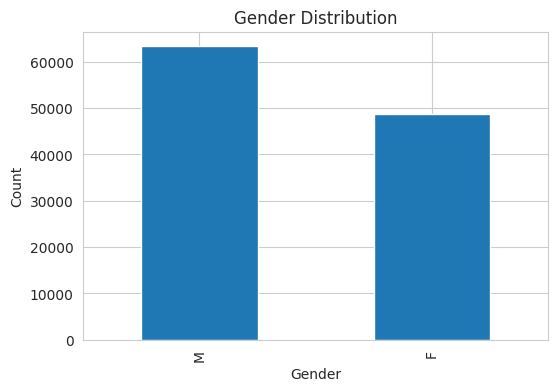

In [ ]:
# Gender Distribution
plt.figure(figsize=(6, 4))
df_patient['Patient Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

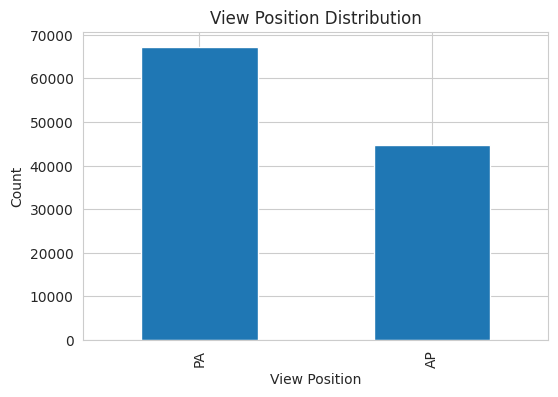

In [ ]:
# View Position Distribution
plt.figure(figsize=(6, 4))
df_patient['View Position'].value_counts().plot(kind='bar')
plt.title('View Position Distribution')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()


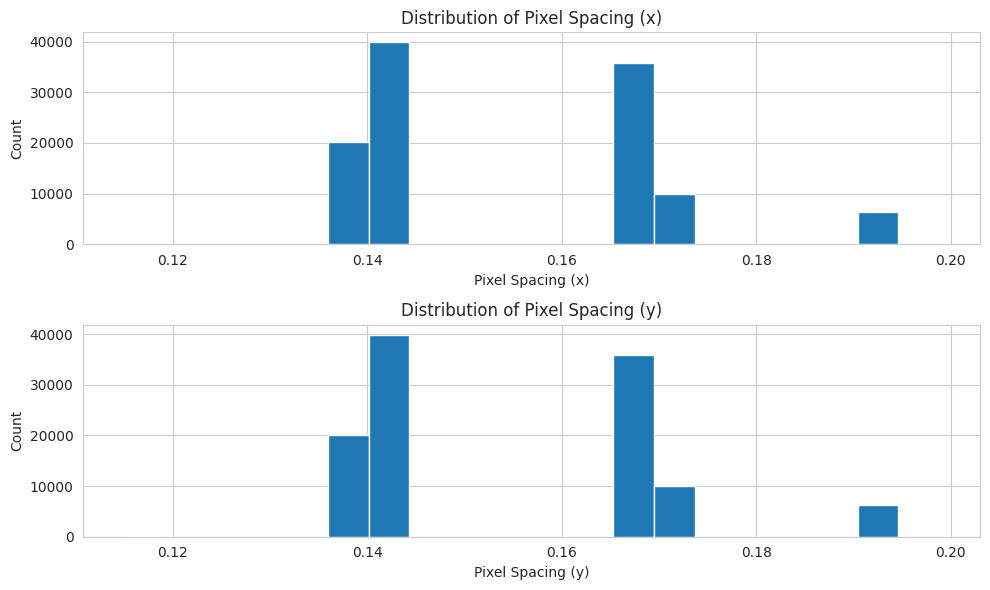

In [ ]:
# Pixel Spacing Distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
df_patient['OriginalImagePixelSpacing[x'].hist(bins=20)
plt.title('Distribution of Pixel Spacing (x)')
plt.xlabel('Pixel Spacing (x)')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
df_patient['y]'].hist(bins=20)
plt.title('Distribution of Pixel Spacing (y)')
plt.xlabel('Pixel Spacing (y)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

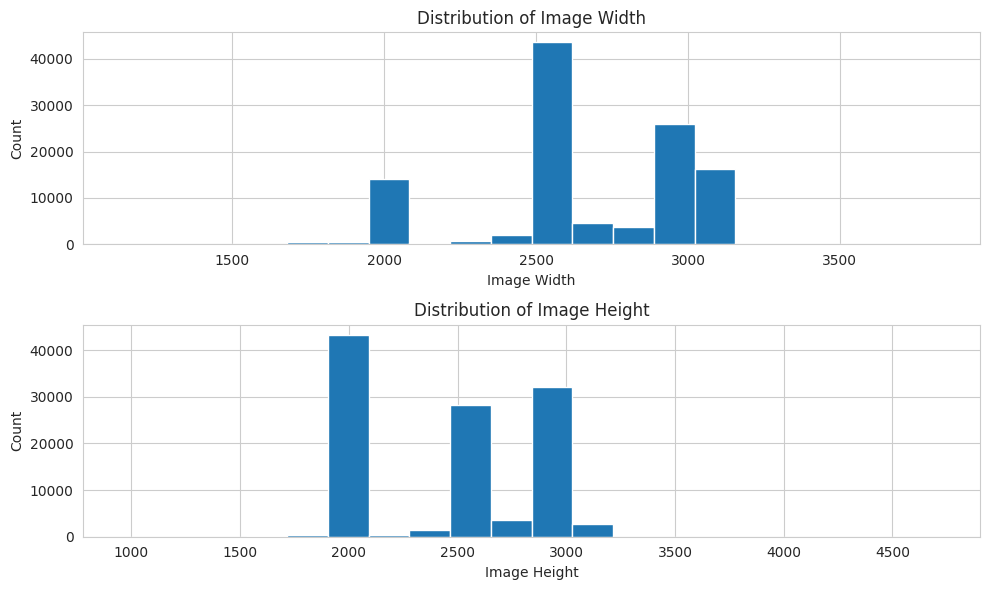

In [ ]:
# Image Dimensions Distribution
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
df_patient['OriginalImage[Width'].hist(bins=20)
plt.title('Distribution of Image Width')
plt.xlabel('Image Width')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
df_patient['Height]'].hist(bins=20)
plt.title('Distribution of Image Height')
plt.xlabel('Image Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [10]:
# reading the lung segmentation dataset
df_segmentation = pd.read_csv(file_path_seg, usecols=['Image Index','Finding Label','Bbox [x','y','w','h]'])
df_segmentation.head()

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


**Data Pre-processing**

Data Pre-processing for disease classification

In [11]:
# remove rows which have greater than 100 as age
total = len(df_patient)
print('No. of rows before removing rows having age >100 : ',len(df_patient))
df_patient = df_patient[df_patient['Patient Age']<100]
print('No. of rows after removing rows having age >100 : ',len(df_patient))
print('No. of datapoints having age > 100 : ',total-len(df_patient))

No. of rows before removing rows having age >100 :  112120
No. of rows after removing rows having age >100 :  112104
No. of datapoints having age > 100 :  16


In [12]:
# remove rows which do not have a gender(M/F) associated with it
total = len(df_patient)
print('No. of rows before cleaning gender column : ',len(df_patient))
df_patient = df_patient[df_patient['Patient Gender'].isin(['M', 'F'])]
print('No. of rows after cleansing gender column : ',len(df_patient))
print('No. of datapoints which do not have a gender associated wih it : ',total-len(df_patient))

No. of rows before cleaning gender column :  112104
No. of rows after cleansing gender column :  112104
No. of datapoints which do not have a gender associated wih it :  0


Data pre-processing for lung segmentation

In [19]:
# Define paths to datasets
train_dataset_path = "chest-xray-masks-and-labels/Lung Segmentation/CXR_png"
mask_directory = "chest-xray-masks-and-labels/Lung Segmentation/masks"
test_dataset_path = "chest-xray-masks-and-labels/Lung Segmentation/test"

In [25]:
# Function to load and preprocess image and mask
def load_data(image_path, mask_path, img_size=(256, 256)):
    image = load_img(image_path, color_mode="grayscale", target_size=img_size)
    mask = load_img(mask_path, color_mode="grayscale", target_size=img_size)

    # Convert images to arrays
    image_array = img_to_array(image) / 255.0  # Normalize pixel values
    mask_array = img_to_array(mask) / 255.0

    return image_array, mask_array

In [26]:
# Function to perform data augmentation
def augment_data(image_array, mask_array):
    augmentation = Compose(
        [
            HorizontalFlip(p=0.5),
            VerticalFlip(p=0.5),
            RandomRotate90(p=0.5),
            ShiftScaleRotate(p=0.5),
            RandomBrightnessContrast(p=0.5),
        ]
    )

    augmented = augmentation(image=image_array, mask=mask_array)
    return augmented["image"], augmented["mask"]


In [28]:
# Load and preprocess training data
X_train = []
y_train = []

for image_name in os.listdir(train_dataset_path):
    if image_name.endswith(".png"):
        image_path = os.path.join(train_dataset_path, image_name)
        mask_name = image_name.replace(".png", "_mask.png")
        mask_path = os.path.join(mask_directory, mask_name)  # Corrected mask path

        #print("Image Path:", image_path)
        #print("Mask Path:", mask_path)

        if os.path.exists(image_path) and os.path.exists(mask_path):
            image_array, mask_array = load_data(image_path, mask_path)
            X_train.append(image_array)
            y_train.append(mask_array)


        #else:
            #print("Image or mask file not found.")

X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
            # Augment data
            augmented_image, augmented_mask = augment_data(image_array, mask_array)
            X_train.append(augmented_image)
            y_train.append(augmented_mask)

In [29]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training masks shape:", y_train.shape)
print("Validation masks shape:", y_val.shape)

Training data shape: (452, 256, 256, 1)
Validation data shape: (114, 256, 256, 1)
Training masks shape: (452, 256, 256, 1)
Validation masks shape: (114, 256, 256, 1)


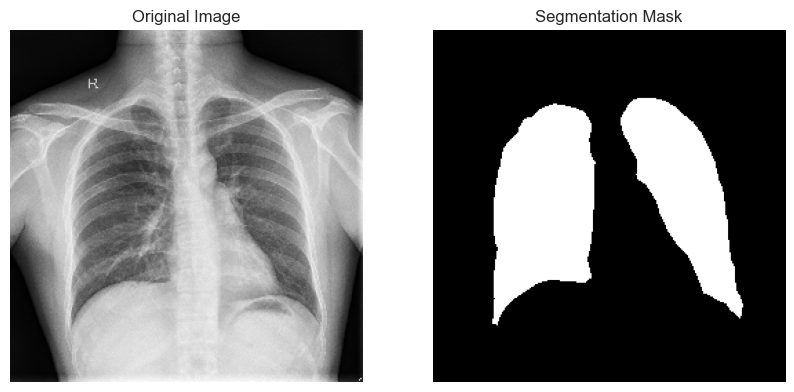

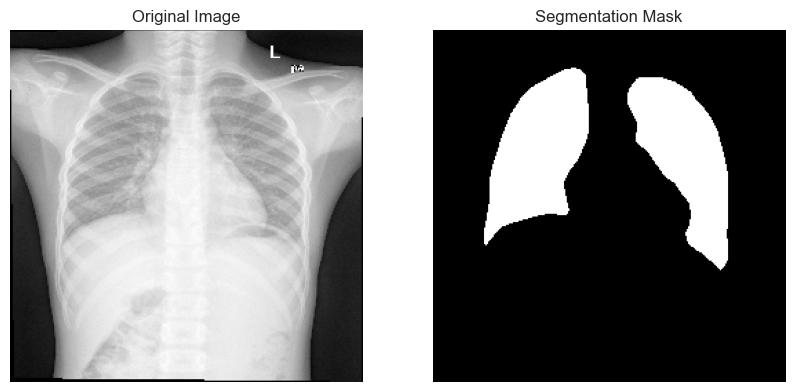

In [30]:
# Function to display original image and its segmentation mask
def display_image_with_mask(image, mask):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')
    plt.show()

# Display original image and its segmentation mask for first two images
for i in range(2):
    display_image_with_mask(X_train[i], y_train[i])

Unet Modeling for lung segmentation

In [31]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [30]:
#modified U-net
def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3, padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, padding='same')(pool1)
    conv2 = Dropout(0.5)(conv2)  # Apply dropout
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3, padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv2)
    up1 = concatenate([up1, conv1], axis=3)
    conv3 = Conv2D(64, 3, padding='same')(up1)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(64, 3, padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv3)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [31]:
# Function to decay the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [32]:
# Prepare model for training
input_shape = X_train[0].shape
model = unet(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[MeanIoU(num_classes=2)])

In [34]:
# Train the model
callbacks = [LearningRateScheduler(scheduler)]
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

Epoch 1/10


KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, mIoU = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Mean IoU:", mIoU)

8/8 [==============================] - 2s 208ms/step - loss: 0.2145 - mean_io_u_9: 0.3738
Validation Loss: 0.21450643241405487
Mean IoU: 0.37379053235054016


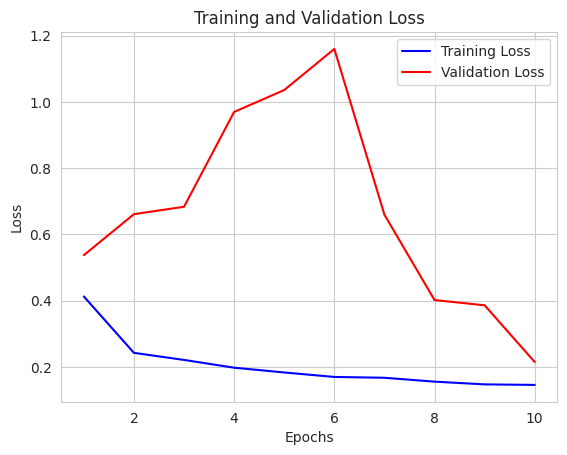

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 18ms/step


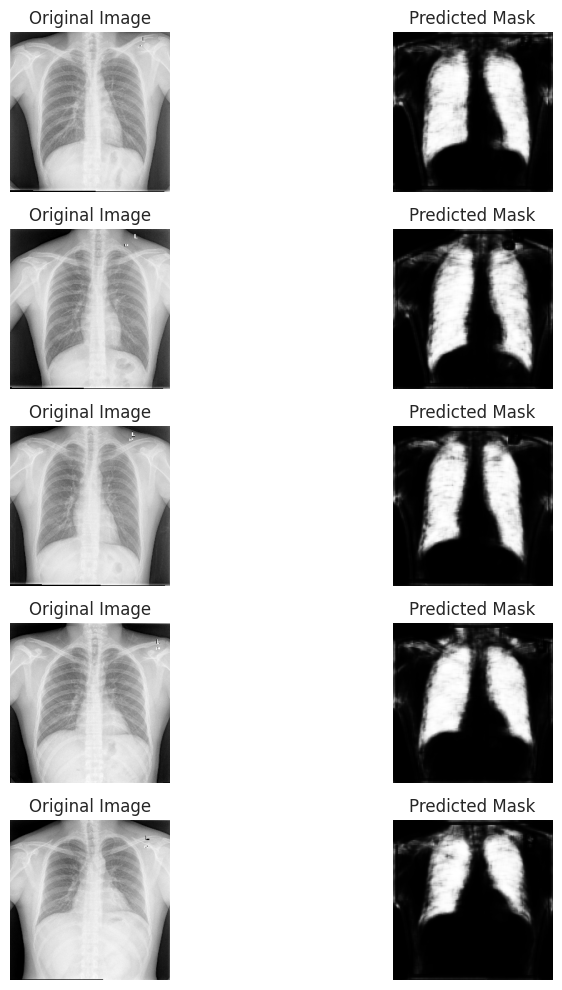

In [ ]:
# Plot original images and predicted masks side by side
import matplotlib.pyplot as plt

n = min(len(X_test), 5)  # Plot up to 5 images
fig, axes = plt.subplots(n, 2, figsize=(10, 10))
for i in range(n):
    # Original image
    axes[i, 0].imshow(X_test[i].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    # Predicted mask
    y_pred = model.predict(X_test[i:i+1])
    axes[i, 1].imshow(y_pred[0].squeeze(), cmap='gray')
    axes[i, 1].set_title('Predicted Mask')
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()

In [23]:
#Segnet implementation

In [36]:
import cv2

# Resize ground truth labels to match model output resolution
resized_y_train = [cv2.resize(label, (512, 512)) for label in y_train]
resized_y_val = [cv2.resize(label, (512, 512)) for label in y_val]

# Convert resized labels to numpy arrays
resized_y_train = np.array(resized_y_train)
resized_y_val = np.array(resized_y_val)

In [39]:
def segnet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv2D(64, 3, padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, padding='same')(pool1)
    conv2 = Dropout(0.5)(conv2)  # Apply dropout
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv2D(128, 3, padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation('relu')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Decoder
    up1 = UpSampling2D(size=(2, 2))(conv2)
    conv3 = Conv2D(128, 3, padding='same')(up1)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv2D(128, 3, padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation('relu')(conv3)

    up2 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(64, 3, padding='same')(up2)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv2D(64, 3, padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation('relu')(conv4)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv4)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [40]:
# Function to decay the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [45]:
# Prepare model for training
input_shape = [256, 256, 1]
model = segnet(input_shape)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[MeanIoU(num_classes=2)])

In [46]:
print(resized_y_val.shape)

(114, 512, 512)


In [47]:
# Training the model with callback
callbacks = [LearningRateScheduler(scheduler)]
history = model.fit(X_train, resized_y_train, validation_data=(X_val, resized_y_val), epochs=10, batch_size=16, callbacks=callbacks)

Epoch 1/10
 8/29 ━━━━━━━━━━━━━━━━━━━━ 29:50 85s/step - loss: 0.5094 - mean_io_u_3: 0.3788

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, mIoU = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Mean IoU:", mIoU)

In [ ]:
# Plot original images and predicted masks side by side
n = min(len(X_test), 5)  # Plot up to 5 images
fig, axes = plt.subplots(n, 2, figsize=(10, 10))
for i in range(n):
    # Original image
    axes[i, 0].imshow(X_test[i].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    # Predicted mask
    y_pred = model.predict(X_test[i:i+1])
    axes[i, 1].imshow(y_pred[0].squeeze(), cmap='gray')
    axes[i, 1].set_title

In [ ]:
# Define U-Net architecture
def unet(input_shape):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    # Add more layers as needed

    # Decoder
    up1 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv2)
    up1 = concatenate([up1, conv1], axis=3)
    conv3 = Conv2D(64, 3, activation='relu', padding='same')(up1)
    conv3 = Conv2D(64, 3, activation='relu', padding='same')(conv3)

    # Add more layers as needed

    outputs = Conv2D(1, 1, activation='sigmoid')(conv3)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Training the model with callback
callbacks = [LearningRateScheduler(scheduler)]
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16, callbacks=callbacks)

In [ ]:
# Define input shape
input_shape = X_train[0].shape

# Create U-Net model
model = unet(input_shape)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=[MeanIoU(num_classes=2)])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16)

# Evaluate the model
loss, mIoU = model.evaluate(X_val, y_val)
print("Validation Loss:", loss)
print("Mean IoU:", mIoU)

Epoch 1/10
57/57 [==============================] - 45s 476ms/step - loss: 0.5001 - mean_io_u: 0.3727 - val_loss: 0.4069 - val_mean_io_u: 0.3745
Epoch 2/10
57/57 [==============================] - 20s 343ms/step - loss: 0.3899 - mean_io_u: 0.3727 - val_loss: 0.3659 - val_mean_io_u: 0.3745
Epoch 3/10
57/57 [==============================] - 19s 328ms/step - loss: 0.3370 - mean_io_u: 0.3727 - val_loss: 0.3265 - val_mean_io_u: 0.3745
Epoch 4/10
57/57 [==============================] - 19s 335ms/step - loss: 0.3094 - mean_io_u: 0.3727 - val_loss: 0.3070 - val_mean_io_u: 0.3745
Epoch 5/10
57/57 [==============================] - 19s 331ms/step - loss: 0.3056 - mean_io_u: 0.3727 - val_loss: 0.3160 - val_mean_io_u: 0.3745
Epoch 6/10
57/57 [==============================] - 19s 329ms/step - loss: 0.2807 - mean_io_u: 0.3727 - val_loss: 0.2518 - val_mean_io_u: 0.3745
Epoch 7/10
57/57 [==============================] - 19s 330ms/step - loss: 0.2387 - mean_io_u: 0.3727 - val_loss: 0.2598 - val_mea

In [ ]:
# Function to preprocess test images
def preprocess_test_images(test_dataset_path):
    test_images = []
    for image_name in os.listdir(test_dataset_path):
        if image_name.endswith(".png"):
            image_path = os.path.join(test_dataset_path, image_name)
            # Load and preprocess test image
            image = load_img(image_path, color_mode="grayscale", target_size=(256, 256))
            image_array = img_to_array(image) / 255.0
            test_images.append(image_array)
    return np.array(test_images)


In [ ]:
# Preprocess test images
X_test = preprocess_test_images(test_dataset_path)

# Predict segmentation masks for test images
y_pred = model.predict(X_test)

3/3 [==============================] - 1s 257ms/step


In [ ]:
model.save("unet_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("unet_model.h5")


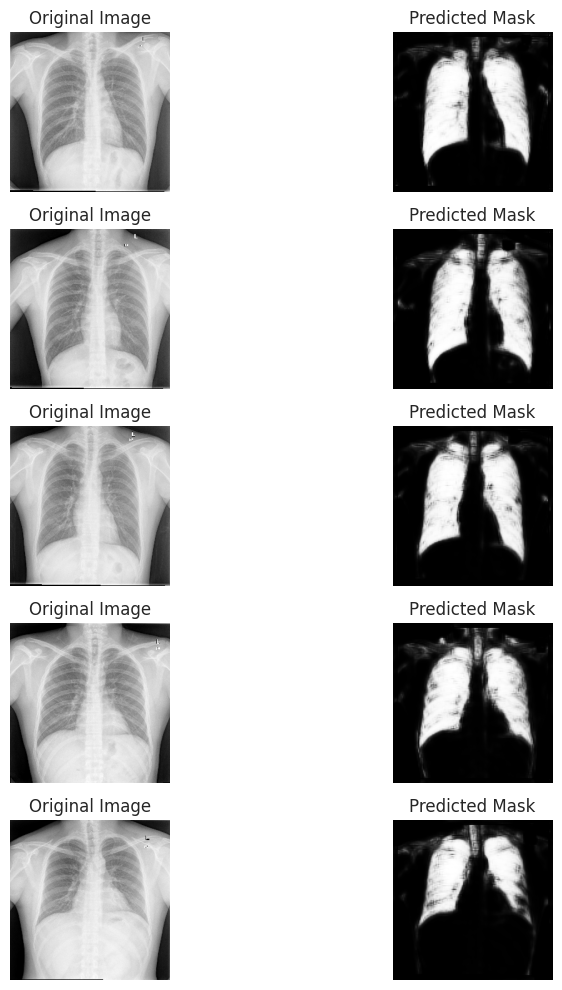

In [ ]:
# Plot original images and predicted masks side by side
n = min(len(X_test), 5)  # Plot up to 5 images
fig, axes = plt.subplots(n, 2, figsize=(10, 10))
for i in range(n):
    # Original image
    axes[i, 0].imshow(X_test[i].squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    # Predicted mask
    axes[i, 1].imshow(y_pred[i].squeeze(), cmap='gray')
    axes[i, 1].set_title('Predicted Mask')
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:

# Function to preprocess X-ray images
def preprocess_xray_images(folder_path):
    images = []
    for folder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, folder_name)
        if os.path.isdir(subfolder_path):
            for folder in os.listdir(subfolder_path):
                subfolder_folder_path = os.path.join(subfolder_path, folder)
                for image_name in os.listdir(subfolder_folder_path):
                    if image_name.endswith(".png"):
                        image_path = os.path.join(subfolder_folder_path, image_name)
                        # Load and preprocess X-ray image
                        image = load_img(image_path, color_mode="grayscale", target_size=(256, 256))
                        image_array = img_to_array(image) / 255.0
                        images.append(image_array)
    return np.array(images)

# Function to segment lung regions using the trained U-Net model
def segment_lung_regions(images):
    segmented_masks = []
    for image in images:
        # Predict segmentation mask for the X-ray image
        mask = model.predict(np.expand_dims(image, axis=0))[0]
        segmented_masks.append(mask)
    return np.array(segmented_masks)

import skimage.feature
import skimage.measure
import skimage.filters

def extract_features(segmented_masks):
    features = []
    for mask in segmented_masks:
        # Ensure the mask is binary
        mask = (mask > 0).astype(np.uint8)

        # Texture Analysis
        glcm = skimage.feature.greycomatrix(mask, [1], [0], levels=2)
        texture_features = skimage.feature.greycoprops(glcm, prop='contrast'), \
                           skimage.feature.greycoprops(glcm, prop='energy'), \
                           skimage.feature.greycoprops(glcm, prop='homogeneity'), \
                           skimage.feature.greycoprops(glcm, prop='correlation')

        # Shape Analysis
        region_props = skimage.measure.regionprops(mask)[0]
        area = region_props.area
        perimeter = region_props.perimeter
        eccentricity = region_props.eccentricity
        solidity = region_props.solidity
        compactness = (perimeter ** 2) / (4 * np.pi * area)

        # Histogram-Based Features
        histogram_features = np.histogram(mask.flatten(), bins=2, range=(0, 1))[0]

        # Gradient-Based Features
        gradient_magnitude = np.sqrt(skimage.filters.sobel(mask)**2 + skimage.filters.sobel(mask.T)**2)
        gradient_features = np.mean(gradient_magnitude), np.std(gradient_magnitude), np.max(gradient_magnitude)

        # Statistical Features
        statistical_features = np.mean(mask), np.median(mask), np.var(mask), np.std(mask)

        # Combine features
        combined_features = np.concatenate((
            np.asarray(texture_features).flatten(),
            [area, perimeter, eccentricity, solidity, compactness],
            histogram_features,
            gradient_features,
            statistical_features
        ))

        features.append(combined_features)

    return np.array(features)

In [ ]:
# Filter out images with valid labels
valid_data_entry = df_patient[df_patient["Finding Labels"].isin(["Normal", "Effusion"])]  # Add desired disease labels

# Preprocess X-ray images
image_paths = [os.path.join("/content/drive/Shareddrives/Data-255/Dataset/data/", filename) for filename in valid_data_entry["Image Index"]]
X_images = preprocess_xray_images("/content/drive/Shareddrives/Data-255/Dataset/data/images_003/images")
#print(X_images)

In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

# Load pre-trained models as feature extractors
base_model1 = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model2 = DenseNet121(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Make all layers in the pre-trained models non-trainable
for layer in base_model1.layers:
    layer.trainable = False
for layer in base_model2.layers:
    layer.trainable = False

# Create ensemble model
def create_ensemble_model():
    input_tensor = Input(shape=(256, 256, 3))

    # Feature extractor 1
    x1 = base_model1(input_tensor)
    x1 = GlobalAveragePooling2D()(x1)

    # Feature extractor 2
    x2 = base_model2(input_tensor)
    x2 = GlobalAveragePooling2D()(x2)

    # Concatenate features
    x = concatenate([x1, x2])
    x = Dropout(0.5)(x)  # Add dropout for regularization
    x = Dense(256, activation='relu')(x)
    output = Dense(2, activation='softmax')(x)  # Assuming binary classification ('Normal', 'Effusion')

    model = Model(inputs=input_tensor, outputs=output)
    return model

# Instantiate and compile the model
ensemble_model = create_ensemble_model()
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to categorical
y_labels_encoded = to_categorical(y_labels.map({'Normal': 0, 'Effusion': 1}))

# Train the ensemble model
ensemble_model.fit(X_images, y_labels_encoded, batch_size=16, epochs=10, validation_split=0.2)

# Evaluate the model
performance = ensemble_model.evaluate(X_images, y_labels_encoded)
print(f'Loss: {performance[0]}, Accuracy: {performance[1]}')

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.

In [ ]:
# Segment lung regions
lung_masks = segment_lung_regions(X_images)
print(lung_masks)
# Extract features from segmented lung regions
#X_features = extract_features(lung_masks)

# Obtain disease labels
y_labels = valid_data_entry["Finding Labels"]

# Train disease classification model using X_features and y_labels
# Use any classification algorithm (e.g., SVM, Random Forest, or neural network) to train the model

1/1 [==============================] - 0s 24ms/step
[[[[0.03346409]
   [0.04998038]
   [0.01605284]
   ...
   [0.01107619]
   [0.01756784]
   [0.01089552]]

  [[0.04235076]
   [0.08124068]
   [0.02385622]
   ...
   [0.01361583]
   [0.01598291]
   [0.01637163]]

  [[0.03997326]
   [0.06274439]
   [0.0149519 ]
   ...
   [0.01673568]
   [0.01049417]
   [0.00805105]]

  ...

  [[0.0644788 ]
   [0.08175053]
   [0.0594897 ]
   ...
   [0.15241896]
   [0.12269653]
   [0.07894355]]

  [[0.04063214]
   [0.10333015]
   [0.0314512 ]
   ...
   [0.25200614]
   [0.21202616]
   [0.14113835]]

  [[0.03146412]
   [0.05990926]
   [0.037239  ]
   ...
   [0.09284531]
   [0.09300018]
   [0.06232756]]]]


1/1 [==============================] - 4s 4s/step


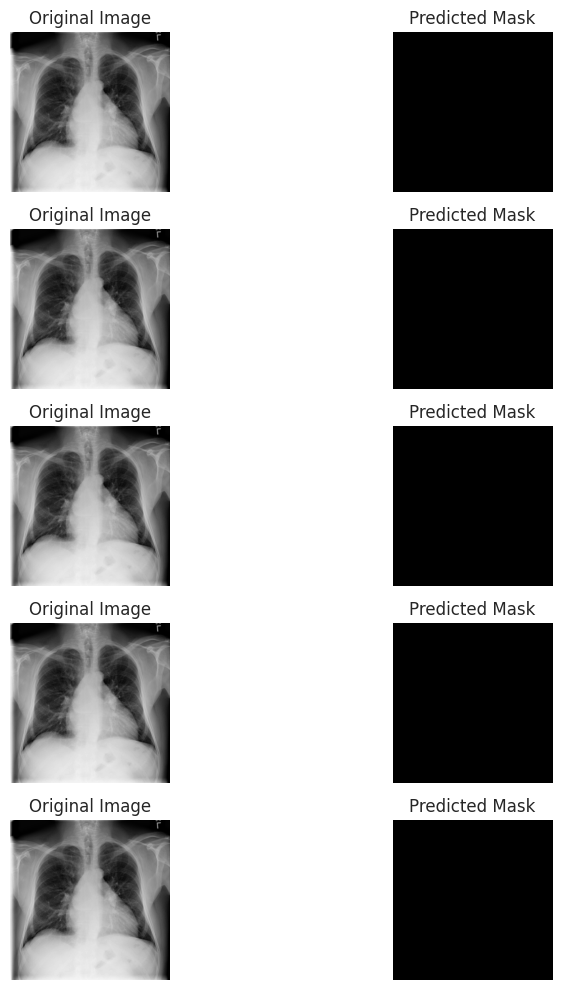

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load the original image
image_path = "/content/drive/Shareddrives/Data-255/Dataset/datatest/images_001/images/00000001_000.png"  # Replace with the path to your original image
original_image = io.imread(image_path)

input_data = original_image.reshape(-1, 256, 256, 1)

# Ensure input data is in the correct data type (e.g., float32)
input_data = input_data.astype(np.float32)


y_pred = model.predict(input_data)
# Plot original images and predicted masks side by side
n = min(len(X_test), 5)  # Plot up to 5 images
fig, axes = plt.subplots(n, 2, figsize=(10, 10))
for i in range(n):
    # Original image
    axes[i, 0].imshow(original_image.squeeze(), cmap='gray')
    axes[i, 0].set_title('Original Image')
    axes[i, 0].axis('off')
    # Predicted mask
    axes[i, 1].imshow(y_pred[i].squeeze(), cmap='gray')
    axes[i, 1].set_title('Predicted Mask')
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()



In [54]:
# File path to the Data Entry of the patients file
file_path_patients = 'data/Data_Entry_2017.csv'
# File path to the Data Entry of the disease classification
file_path_seg = 'data/BBox_List_2017.csv'

In [55]:
# reading the patients' diagnosis information
df_patient = pd.read_csv(file_path_patients, usecols=['Image Index','Finding Labels','Follow-up #','Patient ID','Patient Age','Patient Gender','View Position','OriginalImage[Width','Height]','OriginalImagePixelSpacing[x','y]'])
df_patient.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [59]:

# Function to preprocess X-ray images
def preprocess_xray_images(folder_path):
    images = []
    for folder_name in os.listdir(folder_path):
        subfolder_path = os.path.join(folder_path, folder_name)
        if os.path.isdir(subfolder_path):
            for folder in os.listdir(subfolder_path):
                subfolder_folder_path = os.path.join(subfolder_path, folder)
                for image_name in os.listdir(subfolder_folder_path):
                    if image_name.endswith(".png"):
                        image_path = os.path.join(subfolder_folder_path, image_name)
                        # Load and preprocess X-ray image
                        image = load_img(image_path, color_mode="grayscale", target_size=(256, 256))
                        image_array = img_to_array(image) / 255.0
                        images.append(image_array)
    return np.array(images)

# Function to segment lung regions using the trained U-Net model
def segment_lung_regions(images):
    segmented_masks = []
    for image in images:
        # Predict segmentation mask for the X-ray image
        mask = model.predict(np.expand_dims(image, axis=0))[0]
        segmented_masks.append(mask)
    return np.array(segmented_masks)

import skimage.feature
import skimage.measure
import skimage.filters

def extract_features(segmented_masks):
    features = []
    for mask in segmented_masks:
        # Ensure the mask is binary
        mask = (mask > 0).astype(np.uint8)

        # Texture Analysis
        glcm = skimage.feature.greycomatrix(mask, [1], [0], levels=2)
        texture_features = skimage.feature.greycoprops(glcm, prop='contrast'), \
                           skimage.feature.greycoprops(glcm, prop='energy'), \
                           skimage.feature.greycoprops(glcm, prop='homogeneity'), \
                           skimage.feature.greycoprops(glcm, prop='correlation')

        # Shape Analysis
        region_props = skimage.measure.regionprops(mask)[0]
        area = region_props.area
        perimeter = region_props.perimeter
        eccentricity = region_props.eccentricity
        solidity = region_props.solidity
        compactness = (perimeter ** 2) / (4 * np.pi * area)

        # Histogram-Based Features
        histogram_features = np.histogram(mask.flatten(), bins=2, range=(0, 1))[0]

        # Gradient-Based Features
        gradient_magnitude = np.sqrt(skimage.filters.sobel(mask)**2 + skimage.filters.sobel(mask.T)**2)
        gradient_features = np.mean(gradient_magnitude), np.std(gradient_magnitude), np.max(gradient_magnitude)

        # Statistical Features
        statistical_features = np.mean(mask), np.median(mask), np.var(mask), np.std(mask)

        # Combine features
        combined_features = np.concatenate((
            np.asarray(texture_features).flatten(),
            [area, perimeter, eccentricity, solidity, compactness],
            histogram_features,
            gradient_features,
            statistical_features
        ))

        features.append(combined_features)

    return np.array(features)

In [60]:
# Filter out images with valid labels
valid_data_entry = df_patient[df_patient["Image Index"].isin(["00000001_000.png","00000001_001.png", "00000001_002.png", "00000002_000.png", "00000003_000.png", "00000003_001.png", "00000003_002.png", "00000003_003.png"])]  # Add desired disease labels

In [63]:
# Preprocess X-ray images
image_paths = [os.path.join("data/", filename) for filename in valid_data_entry["Image Index"]]
#Uncomment this for using the real data
X_images = preprocess_xray_images("data/")
print(X_images)

[[[[0.6156863 ]
   [0.60784316]
   [0.49803922]
   ...
   [0.11372549]
   [0.10588235]
   [0.10588235]]

  [[0.57254905]
   [0.41960785]
   [0.22745098]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.3137255 ]
   [0.1254902 ]
   [0.02352941]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.00392157]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]]


 [[[0.10196079]
   [0.12156863]
   [0.13725491]
   ...
   [0.03921569]
   [0.04313726]
   [0.05098039]]

  [[0.14117648]
   [0.14117648]
   [0.14509805]
   ...
   [0.03921569]
   [0.03921569]
   [0.04313726]]

  [[0.16470589]
   [0.16078432]
   [0.15294118]
   ...
   [0.03921569]
   [0.03921569]
   [0.04313726]]

  ...

  [[0.5647059 ]
   [0.6       ]
   [0.6

In [64]:
# Obtain disease labels
y_labels = valid_data_entry["Finding Labels"]
print(y_labels)

0              Cardiomegaly
1    Cardiomegaly|Emphysema
2     Cardiomegaly|Effusion
3                No Finding
4                    Hernia
5                    Hernia
6                    Hernia
7       Hernia|Infiltration
Name: Finding Labels, dtype: object


In [67]:
# Threshold the predicted masks to obtain binary masks
threshold = 0.1  # Adjust the threshold as needed
binary_masks = (y_train > threshold).astype(np.uint8)

# Apply the binary masks to the original X-ray images
masked_images = X_images * binary_masks

ValueError: operands could not be broadcast together with shapes (5404,256,256,1) (452,256,256,1) 

In [66]:
# Define a function to plot images with labels
def plot_images_with_labels(images, labels, titles, figsize=(15, 5)):
    num_images = len(images)
    plt.figure(figsize=figsize)
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{titles[i]}\nLabel: {labels[i]}')
        plt.axis('off')
    plt.show()

# Plot original X-ray images and masked images with labels
num_images = min(len(X_images), len(masked_images), len(y_labels))
plot_images_with_labels([X_images[i] for i in range(num_images)],
                        [y_labels[i] for i in range(num_images)],
                        ['Original Image'] * num_images)
plot_images_with_labels([masked_images[i] for i in range(num_images)],
                        [y_labels[i] for i in range(num_images)],
                        ['Masked Image'] * num_images)

NameError: name 'masked_images' is not defined